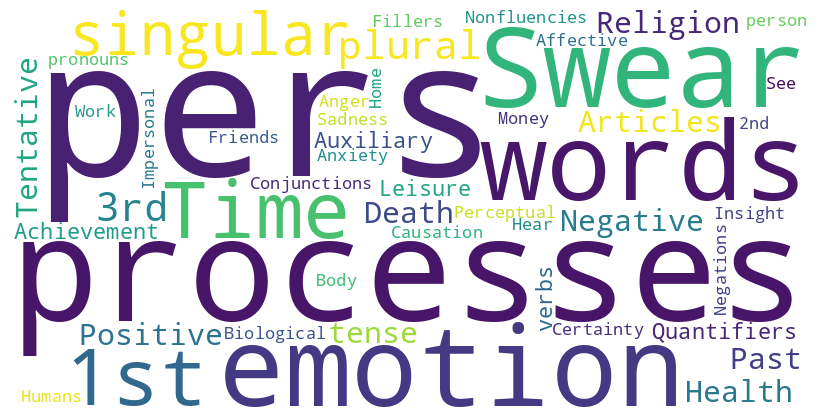

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# LIWC categories
categories_to_check = [
    'Death', 'Health', 'Articles', 'Negative emotion', 'Religion', 'Swear words',
    'Positive emotion', 'Time', 'Past tense', 'Tentative', 'Quantifiers', 'Auxiliary verbs',
    'Leisure', 'Achievement', 'Conjunctions', 'Fillers', 'Negations', 'Insight',
    'Anger', 'Causation', 'Swear words', 'Time', 'Work', 'Money', 'Perceptual processes',
    'Body', 'Biological processes', '1st pers singular', 'Anxiety', 'Friends', 'Nonfluencies',
    'Certainty', 'Affective processes', 'Impersonal pronouns', 'Hear', '1st pers plural',
    '2nd person', '3rd pers plural', 'Humans', 'See', 'Home', '3rd pers singular', 'Sadness'
]

# Joining the category labels into a single string
text = ' '.join(categories_to_check)

# Create a word cloud based on the LIWC categories
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                stopwords = None).generate(text)

# Plot the word cloud
plt.figure(figsize = (8, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from textblob import TextBlob
import scipy.sparse as sp

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Mounted at /content/drive


In [ ]:
# path = "/content/drive/MyDrive/Mental-Health-Twitter.csv"

# columns_to_read = ['post_text', 'label']

# df = pd.read_csv(path, encoding='unicode_escape', usecols=columns_to_read)
# df.rename(columns={'label': 'class'}, inplace=True)
# df.rename(columns={'post_text': 'text'}, inplace=True)
# # num_rows_to_keep = 1000

# # # # Create a new DataFrame with only the specified number of rows
# # df = data.iloc[:num_rows_to_keep]
# print(df)

# mapping = {1: "suicide", 0: "non-suicide"}

# df['class'] = df['class'].map(mapping)

# print(df)

path = "/content/drive/MyDrive/Mental-Health-Twitter.csv"

columns_to_read = ['post_text', 'label']

df = pd.read_csv(path, encoding='unicode_escape', usecols=columns_to_read)
df.rename(columns={'label': 'class', 'post_text': 'text'}, inplace=True)

# Keep only the first 100 and last 100 rows
df = pd.concat([df.head(2000), df.tail(2000)], ignore_index=True)

mapping = {1: "suicide", 0: "non-suicide"}

df['class'] = df['class'].map(mapping)

print(df)


                                                   text        class
0     It's just over 2 years since I was diagnosed w...      suicide
1     It's Sunday, I need a break, so I'm planning t...      suicide
2     Awake but tired. I need to sleep but my brain ...      suicide
3     RT @SewHQ: #Retro bears make perfect gifts and...      suicide
4     Itâs hard to say whether packing lists are m...      suicide
...                                                 ...          ...
3995              A day without sunshine is like night.  non-suicide
3996  Boren's Laws: (1) When in charge, ponder. (2) ...  non-suicide
3997  The flow chart is a most thoroughly oversold p...  non-suicide
3998  Ships are safe in harbor, but they were never ...  non-suicide
3999     Black holes are where God is dividing by zero.  non-suicide

[4000 rows x 2 columns]


In [ ]:
df['class'].dropna(inplace=True)
df['class'].fillna(method='ffill', inplace=True)

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['text'] = df['text'].apply(preprocess_text)

In [ ]:
print(df)

occurrences_counts = df['class'].value_counts()

# Print the counts
print("suicide Count:", occurrences_counts["suicide"])
print("non-suicide Count:", occurrences_counts["non-suicide"])

                                                   text        class
0     2 year since diagnosed anxiety depression toda...      suicide
1     sunday need break im planning spend little tim...      suicide
2                     awake tired need sleep brain idea      suicide
3     rt sewhq retro bear make perfect gift great be...      suicide
4     itâs hard say whether packing list making life...      suicide
...                                                 ...          ...
3995                    day without sunshine like night  non-suicide
3996  borens law 1 charge ponder 2 trouble delegate ...  non-suicide
3997  flow chart thoroughly oversold piece program d...  non-suicide
3998                  ship safe harbor never meant stay  non-suicide
3999                       black hole god dividing zero  non-suicide

[4000 rows x 2 columns]
suicide Count: 2000
non-suicide Count: 2000


In [ ]:
label_mapping = {'suicide': 1, 'non-suicide': 0}
df['class'] = df['class'].replace(label_mapping)

In [ ]:
liwc = '/content/drive/MyDrive/LIWC2015.txt'

In [ ]:
categories_to_check = [
    ('115', 'Death'),
    ('72', 'Health'),
    ('10', 'Articles'),
    ('32', 'Negative emotion'),
    ('114', 'Religion'),
    ('121', 'Swear words'),
    ('31', 'Positive emotion'),
    ('103', 'Time'),
    ('90', 'Past tense'),
    ('54', 'Tentative'),
    ('25', 'Quantifiers'),
    ('12', 'Auxiliary verbs'),
    ('111', 'Leisure'),
    ('82', 'Achievement'),
    ('14', 'Conjunctions'),
    ('125', 'Fillers'),
    ('15', 'Negations'),
    ('51', 'Insight'),
    ('34', 'Anger'),
    ('52', 'Causation'),  # Assuming this is the category for causation
    ('121', 'Swear words'),
    ('103', 'Time'),
    ('110', 'Work'),
    ('113', 'Money'),
    ('61', 'Perceptual processes'),  # Assuming this is the category for perceptual processes
    ('71', 'Body'),
    ('70', 'Biological processes'),
    ('4', '1st pers singular'),
    ('33', 'Anxiety'),
    ('42', 'Friends'),
    ('124', 'Nonfluencies'),
    ('55', 'Certainty'),
    ('30', 'Affective processes'),
    ('9', 'Impersonal pronouns'),
    ('62', 'Hear'),
    ('5', '1st pers plural'),
    ('6', '2nd person'),
    ('8', '3rd pers plural'),
    ('40', 'Humans'),
    ('61', 'See'),
    ('112', 'Home'),
    ('7', '3rd pers singular'),
    ('35', 'Sadness')
]

unique_categories = set(category[1] for category in categories_to_check)
num_unique_categories = len(unique_categories)

print("Number of unique categories:", num_unique_categories)


print(df.head())

for _, category in categories_to_check:
    df[category] = 0

print(df.head())

Number of unique categories: 41
                                                text  class
0  2 year since diagnosed anxiety depression toda...      1
1  sunday need break im planning spend little tim...      1
2                  awake tired need sleep brain idea      1
3  rt sewhq retro bear make perfect gift great be...      1
4  itâs hard say whether packing list making life...      1
                                                text  class  Death  Health  \
0  2 year since diagnosed anxiety depression toda...      1      0       0   
1  sunday need break im planning spend little tim...      1      0       0   
2                  awake tired need sleep brain idea      1      0       0   
3  rt sewhq retro bear make perfect gift great be...      1      0       0   
4  itâs hard say whether packing list making life...      1      0       0   

   Articles  Negative emotion  Religion  Swear words  Positive emotion  Time  \
0         0                 0         0            0       

In [ ]:
word_to_category_mapping = {}

with open(liwc, 'r') as file:
    for line in file:
        parts = line.strip().split('\t')
        if len(parts) <= 2:
            continue
        word = parts[0]
        categories = [category.strip() for category in parts[1:]]
        word_to_category_mapping[word] = categories

print(word_to_category_mapping)

{'(:': ['30', '31', '120', '122'], '(;': ['120', '122'], '):': ['30', '32', '120', '122'], '/:': ['120', '122'], '4ev*': ['120', '122'], ':(': ['30', '32', '120', '122'], ':)': ['30', '31', '120', '122'], ':/': ['120', '122'], ';)': ['120', '122'], 'a': ['1', '10'], 'a-list*': ['80', '83'], 'abandon*': ['30', '32', '35'], 'abdomen*': ['70', '71'], 'abilit*': ['80', '82'], 'able': ['80', '82'], 'abnormal*': ['21', '50', '53'], 'abortion*': ['70', '72', '73'], 'about': ['1', '11', '13'], 'above': ['1', '11', '80', '83', '100', '102'], 'abrupt*': ['100', '103'], 'abs': ['70', '71'], 'absolute': ['50', '55'], 'absolutely': ['1', '13', '50', '55', '120', '123'], 'abstain*': ['80', '85'], 'abt': ['1', '11', '120', '122'], 'abuse*': ['30', '32', '34'], 'abusi*': ['30', '32', '34'], 'academic': ['21', '110'], 'accept': ['20', '30', '31', '50', '51'], 'accepta*': ['30', '31', '50', '51'], 'accepted': ['20', '30', '31', '50', '51', '90'], 'accepting': ['30', '31', '50', '51'], 'accepts': ['20', 

In [ ]:
def update_category_labels(tweet):
    for word in tweet.split():
        if word in word_to_category_mapping:
            mapped_categories = word_to_category_mapping[word]
            for category_num, category_str in categories_to_check:
                if int(category_num) in mapped_categories or category_str in df.columns:
                    df.loc[df['text'] == tweet, category_str] = 1

for tweet in df['text']:
    update_category_labels(tweet)

print(df.head())
print(df)

                                                text  class  Death  Health  \
0  2 year since diagnosed anxiety depression toda...      1      1       1   
1  sunday need break im planning spend little tim...      1      1       1   
2                  awake tired need sleep brain idea      1      1       1   
3  rt sewhq retro bear make perfect gift great be...      1      1       1   
4  itâs hard say whether packing list making life...      1      1       1   

   Articles  Negative emotion  Religion  Swear words  Positive emotion  Time  \
0         1                 1         1            1                 1     1   
1         1                 1         1            1                 1     1   
2         1                 1         1            1                 1     1   
3         1                 1         1            1                 1     1   
4         1                 1         1            1                 1     1   

   ...  Impersonal pronouns  Hear  1st pers plural

In [ ]:
import scipy.sparse as sp
from sklearn.svm import SVC
from textblob import TextBlob
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

X_text = df['text']
y = df[['class']]

LIWC_categories = [category for _, category in categories_to_check]
y = y.join(df[LIWC_categories])

X_text_train, X_temp, y_train, y_temp = train_test_split(X_text, y, test_size=0.2, random_state=42)
X_text_validation, X_text_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train_sentiment = np.array([get_sentiment(text) for text in X_text_train]).reshape(-1, 1)
X_validation_sentiment = np.array([get_sentiment(text) for text in X_text_validation]).reshape(-1, 1)
X_test_sentiment = np.array([get_sentiment(text) for text in X_text_test]).reshape(-1, 1)

scaler = MinMaxScaler()
X_train_sentiment_scaled = scaler.fit_transform(X_train_sentiment)
X_validation_sentiment_scaled = scaler.transform(X_validation_sentiment)
X_test_sentiment_scaled = scaler.transform(X_test_sentiment)

vectorizer = TfidfVectorizer()
X_text_train_tfidf = vectorizer.fit_transform(X_text_train)
X_text_validation_tfidf = vectorizer.transform(X_text_validation)
X_text_test_tfidf = vectorizer.transform(X_text_test)

X_train_combined = sp.hstack([X_text_train_tfidf, X_train_sentiment_scaled]).tocsr()
X_validation_combined = sp.hstack([X_text_validation_tfidf, X_validation_sentiment_scaled]).tocsr()
X_test_combined = sp.hstack([X_text_test_tfidf, X_test_sentiment_scaled]).tocsr()

param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf'],
}

grid_search = GridSearchCV(
    MultiOutputClassifier(SVC()),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

grid_search.fit(X_train_combined, y_train)

best_params = {k.split("__")[1]: v for k, v in grid_search.best_params_.items()}
multi_output_svm_classifier = MultiOutputClassifier(SVC(**best_params))
multi_output_svm_classifier.fit(X_train_combined, y_train)

y_val_pred = multi_output_svm_classifier.predict(X_validation_combined)
validation_accuracy = accuracy_score(y_validation, y_val_pred)

y_test_pred = multi_output_svm_classifier.predict(X_test_combined)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print("Best Parameters:", best_params)
print("Validation Set Accuracy:", validation_accuracy)
print("Test Set Accuracy:", test_accuracy)
print("Test Set Precision:", test_precision)
print("Test Set Recall:", test_recall)
print("Test Set F1 Score:", test_f1)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Validation Set Accuracy: 0.915
Test Set Accuracy: 0.9
Test Set Precision: 0.9500386492870551
Test Set Recall: 0.9807011629866846
Test Set F1 Score: 0.9651153438157152


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9425384472343459
Recall: 0.9733096085409253
F1-score: 0.9576690949106323


In [ ]:
X_train_combined = X_text_train_vectorized
X_test_combined = X_text_test_vectorized

svm_classifier = SVC(kernel='linear')
multi_output_svm_classifier = MultiOutputClassifier(svm_classifier, n_jobs=-1)  # n_jobs=-1 for parallel processing
multi_output_svm_classifier.fit(X_text_train_vectorized, y_train)

y_pred = multi_output_svm_classifier.predict(X_text_test_vectorized)

accuracy_multi = accuracy_score(y_test, y_pred)

print("Multi-label accuracy:", accuracy_multi)

Multi-label accuracy: 0.8925


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.942644540818174
Recall: 0.9752224199288256
F1-score: 0.9586500096746482
